In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


In [2]:
mat = pd.read_csv('train_1.csv')

In [3]:
mat[:3]

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0


In [332]:
x = np.array(mat.drop('Page',axis=1))
pages = mat['Page']
pages, x = shuffle(pages, x)

In [333]:
pages[:5]

129614    Alfred_Hitchcock_fr.wikipedia.org_all-access_s...
28602           拉玛一世_zh.wikipedia.org_all-access_all-agents
125330      Перро,_Шарль_ru.wikipedia.org_all-access_spider
50592     Der_Pferdeflüsterer_de.wikipedia.org_all-acces...
104401    Кларк,_Эмилия_ru.wikipedia.org_desktop_all-agents
Name: Page, dtype: object

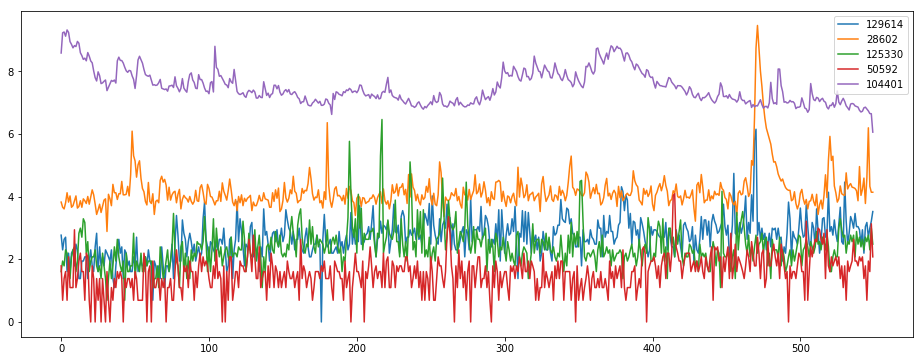

In [336]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(np.log1p(x[:5,:].T))
plt.legend(pages[:5].index)
plt.show()

In [337]:
s = np.log1p(x[3,:]) 
smean = np.mean(s)
smedian = np.median(s)
s = s/smedian
fr=np.fft.fftfreq(550,1)   # a nice helper function to get the frequencies right
fou=np.fft.fft(s)

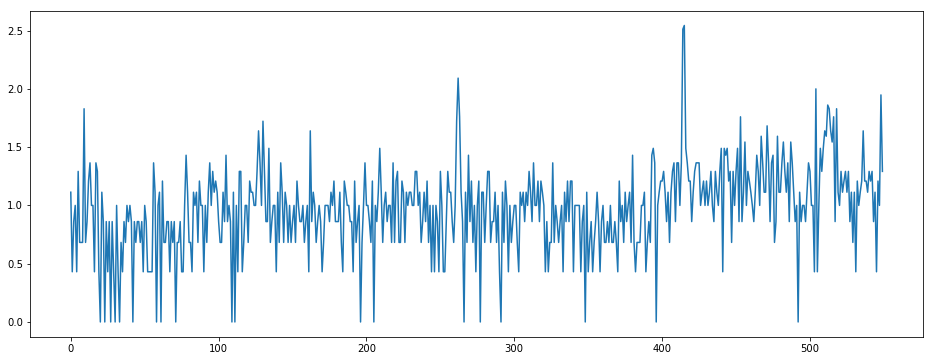

In [338]:
plt.figure(num=None, figsize=(16, 6)) 
plt.plot(np.arange(550),s)
plt.show()

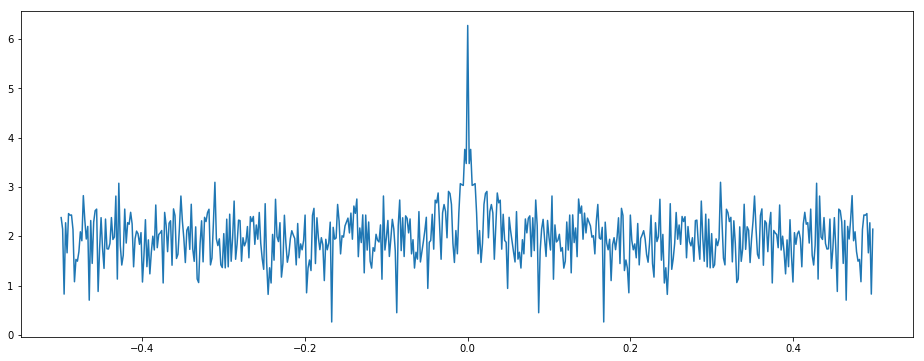

In [339]:
plt.figure(num=None, figsize=(16, 6))
plt.plot(np.fft.fftshift(fr) ,np.log1p(np.fft.fftshift(np.abs(fou)) ))
plt.show()

In [340]:
filtFreq = [n for n in fr[np.argsort(np.abs(fou[:275]))[-10:]]]
df=0.001
gpl = np.zeros(550)
gmn = np.zeros(550)
for f in filtFreq:
    gpl += np.exp(-((fr-f)/(2*df))**2)  # pos. frequencies
    gmn += np.exp(-((fr+f)/(2*df))**2)  # neg. frequencies
g=gpl+gmn    
filt=fou*g

In [341]:
filtFreq

[0.036363636363636362,
 0.023636363636363636,
 0.005454545454545455,
 0.0072727272727272727,
 0.0090909090909090905,
 0.42909090909090908,
 0.31090909090909091,
 0.0018181818181818182,
 0.0036363636363636364,
 0.0]

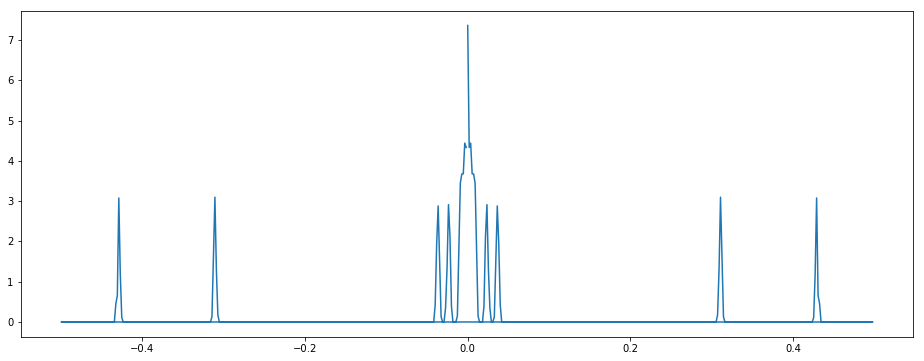

In [342]:
plt.figure(num=None, figsize=(16, 6)) 
plt.plot(fr,np.log1p(np.abs(filt)))
plt.show()

In [343]:
s2=np.fft.ifft(filt)

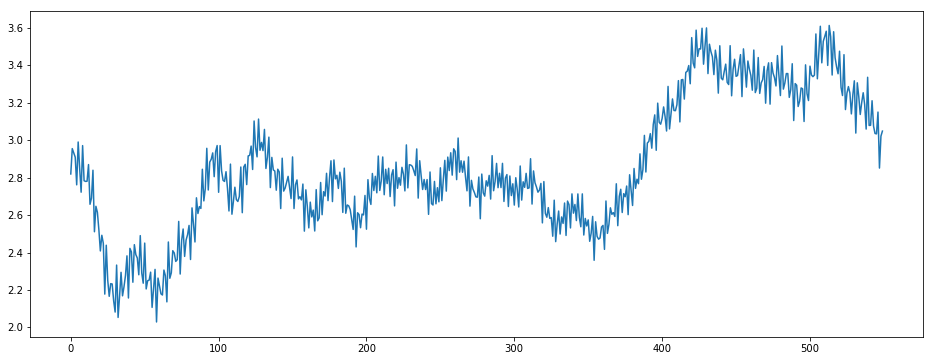

In [344]:
plt.figure(num=None, figsize=(16, 6)) 
plt.plot(np.arange(550),np.real(s2))
plt.show()

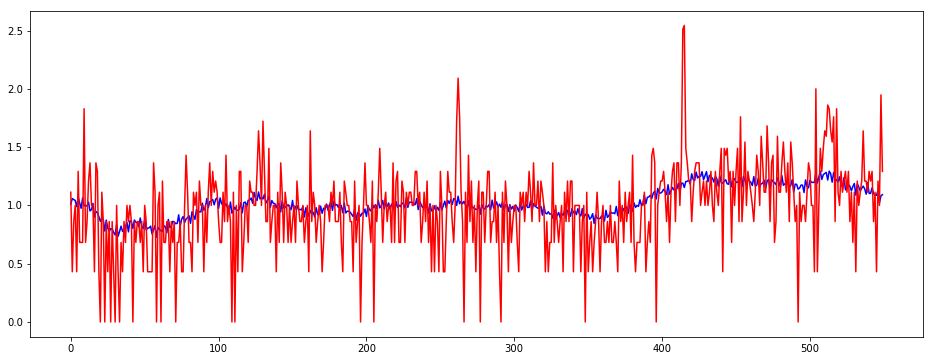

In [345]:
plt.figure(num=None, figsize=(16, 6)) 
plt.plot(np.arange(550),np.real(s2)/np.median(np.real(s2)),'b-')
plt.plot(np.arange(550),s,'r-')
plt.show()

# DISRUPTED

In [3]:
import tensorflow as tf

In [5]:
from random import randint

In [4]:
x = np.array(mat.fillna(0))

In [49]:
#s = np.log1p(x[:,-4].astype(float))
k = randint(1,len(mat))
s = np.log1p(x[k,3:].astype(float))
smedian = np.median(s)
s = (s-smedian)/smedian
fr=np.fft.fftfreq(len(s)/2,1) 

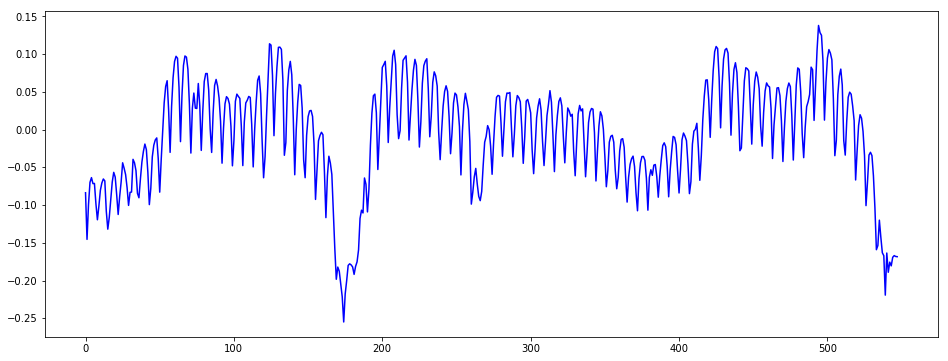

In [50]:
plt.figure(num=None, figsize=(16, 6)) 
plt.plot(s,'b-')
plt.show()

In [51]:
fou = tf.fft(s[:len(s)/2], name=None)

In [52]:
#a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
#b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
#c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
fou = sess.run(fou)


In [53]:
filtFreq = [n for n in fr[np.argsort(np.abs(fou[:len(s)/4]))[-10:]]]
df=0.001
gpl = np.zeros(len(s)/2)
gmn = np.zeros(len(s)/2)
for f in filtFreq:
    gpl += np.exp(-((fr-f)/(2*df))**2)  # pos. frequencies
    gmn += np.exp(-((fr+f)/(2*df))**2)  # neg. frequencies
g=gpl+gmn    
foufilt=fou*g

In [54]:
sfilt = tf.ifft(foufilt,name=None)
sfilt = sess.run(sfilt)

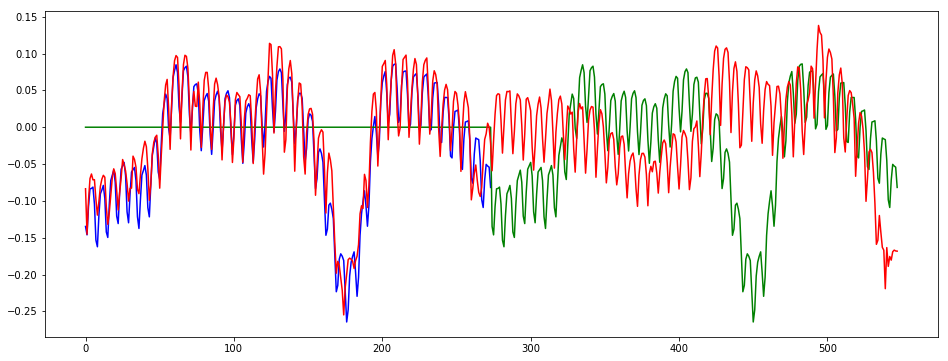

In [55]:
plt.figure(num=None, figsize=(16, 6)) 
plt.plot(np.arange(len(s)/2),np.real(sfilt),'b-')
plt.plot(np.arange(len(s)),[0]*(len(s)/2) + list(np.real(sfilt)),'g-')
plt.plot(np.arange(len(s)),s,'r-')
plt.show() 

In [219]:
[0]*5

[0, 0, 0, 0, 0]

In [13]:
365*1.5

547.5